# Пример анализа данных
## Open Policing Project
### Датасет содержит информацию об остановках автомобилей полицией

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# загрузить данные в DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/ibbvs/jasa/main/ML-labs/data%20sources/police.csv", parse_dates=["stop_date", "stop_time"])
df.head(3)

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,2023-12-18 01:55:00,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,2023-12-18 08:15:00,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,2023-12-18 23:15:00,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [ ]:
df.shape

(91741, 15)

In [ ]:
def get_info(df, uniq_value=False, fraquency=False, quantile=False):
    types = df.dtypes
    null_cols = df.isnull().sum()
    count_cols = df.apply(lambda col: col.nunique())
    unique_cols = df.apply(lambda col: col.unique())
    vcounts_cols = df.apply(lambda col: dict(col.value_counts().items()))
    quantile_cols = pd.Series([np.around(np.nanquantile(l_vals, q=[0, 0.25, 0.5, 0.75, 1]), 1) if l_vals.dtype in [int, float] else "Категориальный Признак" for l_vals in unique_cols.values], index=df.columns)


    descr_df = pd.concat([types, null_cols, count_cols], axis=1)
    descr_df = descr_df.rename(columns={0: "Тип Данных", 1: "Кол-во пропусков", 2: "Кол-во уник. значений"})
    descr_df.index.name = f"Поле/Столбец ({df.shape[0]} значений)"


    if uniq_value:
        descr_df["Уник. значения"] = unique_cols

    if fraquency:
        descr_df["Частота"] = vcounts_cols

    if quantile:
        descr_df["0|25|50|75|100 % квантили"] = quantile_cols


    return descr_df


descr_df = get_info(df, True, True, True)

descr_df

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


,Тип Данных,Кол-во пропусков,Кол-во уник. значений,Уник. значения,Частота,0|25|50|75|100 % квантили
Поле/Столбец (91741 значений),,,,,,
stop_date,datetime64[ns],0,3768,"[2005-01-02T00:00:00.000000000, 2005-01-18T00:...","{2012-01-11 00:00:00: 69, 2012-02-28 00:00:00:...",Категориальный Признак
stop_time,datetime64[ns],0,1436,"[2023-12-18T01:55:00.000000000, 2023-12-18T08:...","{2023-12-18 11:00:00: 323, 2023-12-18 10:00:00...",Категориальный Признак
county_name,float64,91741,0,[nan],{},"[nan, nan, nan, nan, nan]"
driver_gender,object,5335,2,"[M, F, nan]","{'M': 62895, 'F': 23511}",Категориальный Признак
driver_age_raw,float64,5327,97,"[1985.0, 1965.0, 1972.0, 1986.0, 1984.0, 1982....","{1987.0: 3653, 1988.0: 3631, 1986.0: 3596, 198...","[0.0, 1941.0, 1965.0, 1989.0, 8801.0]"
driver_age,float64,5621,78,"[20.0, 40.0, 33.0, 19.0, 21.0, 23.0, 36.0, 35....","{22.0: 4125, 21.0: 4063, 23.0: 3986, 20.0: 379...","[15.0, 34.2, 53.5, 72.8, 99.0]"
driver_race,object,5333,5,"[White, Black, Asian, nan, Hispanic, Other]","{'White': 62158, 'Black': 12244, 'Hispanic': 9...",Категориальный Признак
violation_raw,object,5333,12,"[Speeding, Call for Service, Equipment/Inspect...","{'Speeding': 48463, 'Other Traffic Violation':...",Категориальный Признак
violation,object,5333,6,"[Speeding, Other, Equipment, Moving violation,...","{'Speeding': 48463, 'Moving violation': 16224,...",Категориальный Признак


In [ ]:
df.describe()

,county_name,driver_age_raw,driver_age
count,0.0,86414.000000,86120.000000
mean,NaN,1970.491228,34.011333
std,NaN,110.914909,12.738564
min,NaN,0.000000,15.000000
25%,NaN,1967.000000,23.000000
50%,NaN,1980.000000,31.000000
75%,NaN,1987.000000,43.000000
max,NaN,8801.000000,99.000000


## 1. Удалить столбец, в котром отсутствуют данные

- Методы drop, dropna
- Обратить внимание на аргументы по-умолчанию
- Проверить результат

In [ ]:
df = df.drop("county_name", axis=1)


descr_df = get_info(df, True, True)

descr_df

,Тип Данных,Кол-во пропусков,Кол-во уник. значений,Уник. значения,Частота
Поле/Столбец (91741 значений),,,,,
stop_date,datetime64[ns],0,3768,"[2005-01-02T00:00:00.000000000, 2005-01-18T00:...","{2012-01-11 00:00:00: 69, 2012-02-28 00:00:00:..."
stop_time,datetime64[ns],0,1436,"[2023-12-18T01:55:00.000000000, 2023-12-18T08:...","{2023-12-18 11:00:00: 323, 2023-12-18 10:00:00..."
driver_gender,object,5335,2,"[M, F, nan]","{'M': 62895, 'F': 23511}"
driver_age_raw,float64,0,97,"[1985.0, 1965.0, 1972.0, 1986.0, 1984.0, 1982....","{1970.0: 6999, 1987.0: 3653, 1988.0: 3631, 198..."
driver_age,float64,5621,78,"[20.0, 40.0, 33.0, 19.0, 21.0, 23.0, 36.0, 35....","{22.0: 4125, 21.0: 4063, 23.0: 3986, 20.0: 379..."
driver_race,object,5333,5,"[White, Black, Asian, nan, Hispanic, Other]","{'White': 62158, 'Black': 12244, 'Hispanic': 9..."
violation_raw,object,5333,12,"[Speeding, Call for Service, Equipment/Inspect...","{'Speeding': 48463, 'Other Traffic Violation':..."
violation,object,5333,6,"[Speeding, Other, Equipment, Moving violation,...","{'Speeding': 48463, 'Moving violation': 16224,..."
search_conducted,bool,0,2,"[False, True]","{False: 88545, True: 3196}"


## 2. Кто чаще нарушает скоростной режим - женщины или мужчины?

- Столбцы: driver_gender, violation
- Разные способы ответить на вопрос

In [ ]:
violations = df.groupby(["violation", "driver_gender"]).size().unstack()

violations

driver_gender,F,M
violation,,
Equipment,2487,8533
Moving violation,3204,13020
Other,690,3627
Registration/plates,1013,2419
Seat belt,635,2317
Speeding,15482,32979


In [ ]:
male, female = violations.loc['Speeding']['M'], violations.loc['Speeding']['F']


print(f"Количество нарушений скоростного режима совершенных мужчинами = {male}")
print(f"Количество нарушений скоростного режима совершенных женщинами = {female}")
print("Чаще нарушают мужчины") if male > female else "Чаще нарушают женщины" if female > male else "Мужчины и Женщины совершают одинаковое количество нарушений"

Количество нарушений скоростного режима совершенных мужчинами = 32979
Количество нарушений скоростного режима совершенных женщинами = 15482
Чаще нарушают мужчины


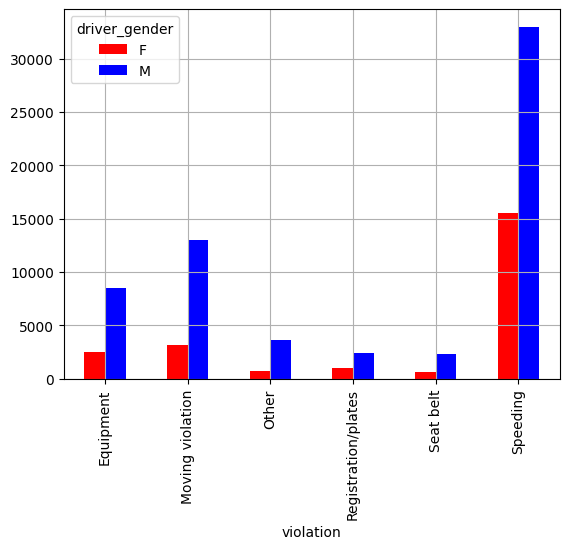

In [ ]:
violations.plot(kind='bar', color=["red", "blue"], grid=True)
plt.show()

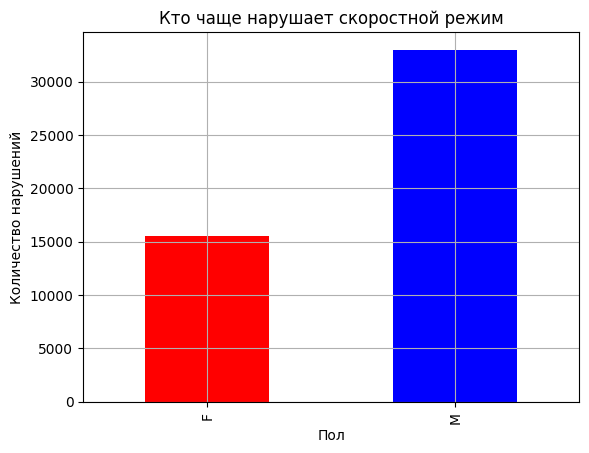

In [ ]:
violations.loc["Speeding"].plot(kind="bar", color=["red", "blue"], grid=True)

plt.title("Кто чаще нарушает скоростной режим")
plt.xlabel("Пол")
plt.ylabel("Количество нарушений")

plt.show()

## 3. Влияет ли пол водителя на проведение розыска во время остановки?

- Столбцы: driver_gender, search_conducted
- Трудно определить причинно-следственную связь, но можно выявить отношения
- Использовать все доступные факторы для выявления отношений

### Количество проведенных розысков в зависимости от пола

In [ ]:
df["driver_gender"] = df["driver_gender"].fillna("Nonbinary")


descr_df = get_info(df)
descr_df

,Тип Данных,Кол-во пропусков,Кол-во уник. значений
Поле/Столбец (91741 значений),,,
stop_date,datetime64[ns],0,3768
stop_time,datetime64[ns],0,1436
driver_gender,object,0,3
driver_age_raw,float64,5327,97
driver_age,float64,0,78
driver_race,object,5333,5
violation_raw,object,5333,12
violation,object,5333,6
search_conducted,bool,0,2


In [ ]:
search_counts = df.groupby(["driver_gender", "search_conducted"]).size().unstack()

search_counts

search_conducted,False,True
driver_gender,,
F,23040.0,471.0
M,60170.0,2725.0
Nonbinary,5335.0,NaN


In [ ]:
search_counts = search_counts.drop("Nonbinary")

search_counts

search_conducted,False,True
driver_gender,,
F,23040.0,471.0
M,60170.0,2725.0


In [ ]:
search_counts["ratio (%)"] = np.around(search_counts[True] / search_counts[False] * 100, 2)

search_counts

search_conducted,False,True,ratio (%)
driver_gender,,,
F,23040,471,2.04
M,60170,2725,4.53


### Смотрю на другие признаки, что могут влиять на проведение розыска



1.   Возраст - driver_age
2.   Раса - driver_race
3.   Тип нарушения - violation
4.   Время остановки - stop_time

In [ ]:
descr_df = get_info(df, fraquency=True)

descr_df

,Тип Данных,Кол-во пропусков,Кол-во уник. значений,Частота
Поле/Столбец (91741 значений),,,,
stop_date,datetime64[ns],0,3768,"{2012-01-11 00:00:00: 69, 2012-02-28 00:00:00:..."
stop_time,datetime64[ns],0,1436,"{2023-12-18 11:00:00: 323, 2023-12-18 10:00:00..."
driver_gender,object,0,3,"{'M': 62895, 'F': 23511, 'Nonbinary': 5335}"
driver_age_raw,float64,5327,97,"{1987.0: 3653, 1988.0: 3631, 1986.0: 3596, 198..."
driver_age,float64,0,78,"{31.0: 7821, 22.0: 4125, 21.0: 4063, 23.0: 398..."
driver_race,object,5333,5,"{'White': 62158, 'Black': 12244, 'Hispanic': 9..."
violation_raw,object,5333,12,"{'Speeding': 48463, 'Other Traffic Violation':..."
violation,object,5333,6,"{'Speeding': 48463, 'Moving violation': 16224,..."
search_conducted,bool,0,2,"{False: 88545, True: 3196}"


#### Возраст

<Axes: >

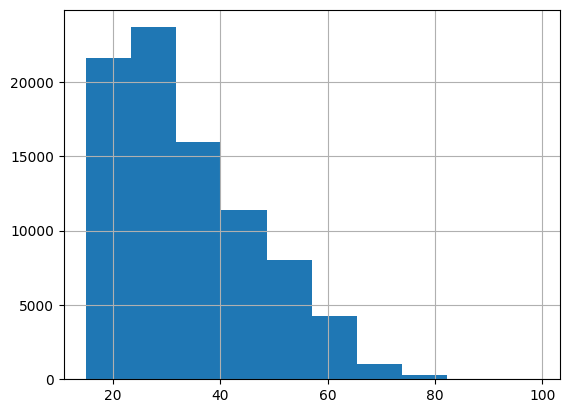

In [ ]:
# Больше молодых людей
df["driver_age"].hist()

In [ ]:
from sklearn.impute import SimpleImputer


# Заменяю числовые пропуски на медиану
num_transformer = SimpleImputer(strategy="median")

df["driver_age"] = num_transformer.fit_transform(df["driver_age"].values.reshape(-1,1))

df["driver_age"].isnull().sum()

0

In [ ]:
df["age_bins"] = pd.cut(df["driver_age"], bins=4, labels=False)


search_counts = df.groupby(["driver_gender", "search_conducted", "age_bins"]).size().unstack().fillna(0)

search_counts

age_bins                              0        1       2     3
driver_gender search_conducted                                
F             False             15552.0   6512.0   954.0  22.0
              True                373.0     95.0     3.0   0.0
M             False             37094.0  19280.0  3711.0  85.0
              True               2039.0    634.0    51.0   1.0
Nonbinary     False              5333.0      2.0     0.0   0.0

In [ ]:
search_counts_ratio_F = np.around(search_counts.loc["F", True] / search_counts.loc["F", False] * 100, 2)
search_counts_ratio_M = np.around(search_counts.loc["M", True] / search_counts.loc["M", False] * 100, 2)

search_counts_ratio = pd.concat([search_counts_ratio_F, search_counts_ratio_M], axis=1, keys=["F ratio (%)", "M ratio (%)"])

search_counts_ratio

,F ratio (%),M ratio (%)
age_bins,,
0,2.40,5.50
1,1.46,3.29
2,0.31,1.37
3,0.00,1.18


#### Раса (5333 пропусков)

In [ ]:
descr_df.loc["driver_race"]["Частота"]

{'White': 62158, 'Black': 12244, 'Hispanic': 9507, 'Asian': 2259, 'Other': 240}

In [ ]:
df["driver_race"] = df["driver_race"].fillna("Other")

df["driver_age"].isnull().sum()

0

In [ ]:
search_counts = df.groupby(["driver_gender", "search_conducted", "driver_race"]).size().unstack().fillna(0)

search_counts

driver_race                      Asian   Black  Hispanic   Other    White
driver_gender search_conducted                                           
F             False              507.0  2473.0    1802.0    26.0  18232.0
              True                 6.0   107.0      69.0     0.0    289.0
M             False             1701.0  8981.0    7121.0   211.0  42156.0
              True                45.0   683.0     515.0     3.0   1479.0
Nonbinary     False                0.0     0.0       0.0  5333.0      2.0

In [ ]:
search_counts_ratio_F = np.around(search_counts.loc["F", True] / search_counts.loc["F", False] * 100, 2)
search_counts_ratio_M = np.around(search_counts.loc["M", True] / search_counts.loc["M", False] * 100, 2)

search_counts_ratio = pd.concat([search_counts_ratio_F, search_counts_ratio_M], axis=1, keys=["F ratio (%)", "M ratio (%)"])

search_counts_ratio

,F ratio (%),M ratio (%)
driver_race,,
Asian,1.18,2.65
Black,4.33,7.60
Hispanic,3.83,7.23
Other,0.00,1.42
White,1.59,3.51


#### Тип нарушения

In [ ]:
descr_df.loc["violation"]["Частота"]

{'Speeding': 48463,
 'Moving violation': 16224,
 'Equipment': 11020,
 'Other': 4317,
 'Registration/plates': 3432,
 'Seat belt': 2952}

In [ ]:
df["violation"] = df["violation"].fillna("Other")

search_counts = df.groupby(["driver_gender", "search_conducted", "violation"]).size().unstack().fillna(0)

search_counts

violation                       Equipment  Moving violation   Other  \
driver_gender search_conducted                                        
F             False                2381.0            3088.0   651.0   
              True                  106.0             116.0    39.0   
M             False                7935.0           12241.0  3456.0   
              True                  598.0             779.0   171.0   
Nonbinary     False                   0.0               0.0  5333.0   

violation                       Registration/plates  Seat belt  Speeding  
driver_gender search_conducted                                            
F             False                           946.0      627.0   15347.0  
              True                             67.0        8.0     135.0  
M             False                          2152.0     2229.0   32157.0  
              True                            267.0       88.0     822.0  
Nonbinary     False                             0.0        0.0       2.0

In [ ]:
search_counts_ratio_F = np.around(search_counts.loc["F", True] / search_counts.loc["F", False] * 100, 2)
search_counts_ratio_M = np.around(search_counts.loc["M", True] / search_counts.loc["M", False] * 100, 2)

search_counts_ratio = pd.concat([search_counts_ratio_F, search_counts_ratio_M], axis=1, keys=["F ratio (%)", "M ratio (%)"])

search_counts_ratio

,F ratio (%),M ratio (%)
violation,,
Equipment,4.45,7.54
Moving violation,3.76,6.36
Other,5.99,4.95
Registration/plates,7.08,12.41
Seat belt,1.28,3.95
Speeding,0.88,2.56


#### Время остановки

In [ ]:
descr_df.loc["stop_duration"]["Частота"]

{'0-15 Min': 69543, '16-30 Min': 13635, '30+ Min': 3228, '2': 1, '1': 1}

In [ ]:
cat_transformer = SimpleImputer(strategy="most_frequent")

df["stop_duration"] = cat_transformer.fit_transform(df["stop_duration"].values.reshape(-1,1))

df["stop_duration"].isnull().sum()

0

In [ ]:
search_counts = df.groupby(["driver_gender", "search_conducted", "stop_duration"]).size().unstack().fillna(0)

search_counts

stop_duration                   0-15 Min    1  16-30 Min    2  30+ Min
driver_gender search_conducted                                        
F             False              19590.0  1.0     3178.0  0.0    271.0
              True                 134.0  0.0      212.0  0.0    125.0
M             False              48998.0  0.0     9095.0  1.0   2076.0
              True                 819.0  0.0     1150.0  0.0    756.0
Nonbinary     False               5335.0  0.0        0.0  0.0      0.0

In [ ]:
search_counts_ratio_F = np.around(search_counts.loc["F", True] / search_counts.loc["F", False] * 100, 2)
search_counts_ratio_M = np.around(search_counts.loc["M", True] / search_counts.loc["M", False] * 100, 2)

search_counts_ratio = pd.concat([search_counts_ratio_F, search_counts_ratio_M], axis=1, keys=["F ratio (%)", "M ratio (%)"])

search_counts_ratio

,F ratio (%),M ratio (%)
stop_duration,,
0-15 Min,0.68,1.67
1,0.00,NaN
16-30 Min,6.67,12.64
2,NaN,0.00
30+ Min,46.13,36.42


### 4. Почему вид розыска (search_type) так часто отсутствует?

- Столбцы: driver_gender, search_conducted
- pandas во время расчетов по-умолчанию выбрасывает отсутствующие данные (Null, NA, NaN, False)
- Использовать все доступные факторы для выявления отношений

In [ ]:
descr_df.loc["search_type"]["Частота"]

{'Incident to Arrest': 1219,
 'Probable Cause': 891,
 'Inventory': 220,
 'Reasonable Suspicion': 197,
 'Protective Frisk': 161,
 'Incident to Arrest,Inventory': 129,
 'Incident to Arrest,Probable Cause': 106,
 'Probable Cause,Reasonable Suspicion': 75,
 'Incident to Arrest,Inventory,Probable Cause': 34,
 'Incident to Arrest,Protective Frisk': 33,
 'Probable Cause,Protective Frisk': 33,
 'Inventory,Probable Cause': 22,
 'Incident to Arrest,Reasonable Suspicion': 13,
 'Inventory,Protective Frisk': 11,
 'Incident to Arrest,Inventory,Protective Frisk': 11,
 'Protective Frisk,Reasonable Suspicion': 11,
 'Incident to Arrest,Probable Cause,Protective Frisk': 10,
 'Incident to Arrest,Probable Cause,Reasonable Suspicion': 6,
 'Incident to Arrest,Inventory,Reasonable Suspicion': 4,
 'Inventory,Reasonable Suspicion': 4,
 'Inventory,Probable Cause,Protective Frisk': 2,
 'Inventory,Probable Cause,Reasonable Suspicion': 2,
 'Incident to Arrest,Protective Frisk,Reasonable Suspicion': 1,
 'Probable Ca

In [ ]:
# Вид розыска равен количеству проведенных розысков, когда search_conducted == True
# Следовательно, он заполняется только при аресте
df["search_conducted"].shape == df["search_type"].shape

True

### 5. Как часто водителя обыскивают (Protective Frisk)?

- Столбцы: search_type
- строковые методы для поиска частичных совпадений

In [ ]:
print(f'Количество произведенных обысков = {(df["search_conducted"] == True).sum()}\nКоличество "Protective Frisk" = {descr_df.loc["search_type"]["Частота"]["Protective Frisk"]}')

Количество произведенных обысков = 3196
Количество "Protective Frisk" = 161


### 6. В каком году меньше всего полиция останавливала автомобили?

- Столбцы: stop_date, stop_time
- тип данных datetime и его методы

In [ ]:
df["stop_date_year"] = df["stop_date"].dt.year


descr_df = get_info(df, True, True, True)


# 2005 год
descr_df.loc["stop_date_year"]["Частота"]

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


{2012: 10970,
 2006: 10639,
 2007: 9476,
 2014: 9228,
 2008: 8752,
 2015: 8599,
 2011: 8126,
 2013: 7924,
 2009: 7908,
 2010: 7561,
 2005: 2558}

### 7. Как изменялось количество остановок, связанных с запрещенными веществами, в течение дня?

- Столбцы: stop_datetime, drug_related_stop
- groubby
- plot

In [ ]:
df["stop_time_hour"] = df["stop_time"].dt.hour

descr_df = get_info(df, True, True, True)



descr_df.loc["stop_time_hour"]["Частота"]

{10: 7350,
 9: 6838,
 11: 5877,
 14: 5634,
 23: 5629,
 0: 5221,
 8: 5210,
 13: 4842,
 15: 4832,
 7: 4572,
 1: 4442,
 16: 3844,
 12: 3582,
 22: 3473,
 20: 3340,
 6: 3290,
 2: 2975,
 17: 2900,
 19: 2587,
 18: 2168,
 21: 1499,
 3: 1172,
 4: 254,
 5: 210}

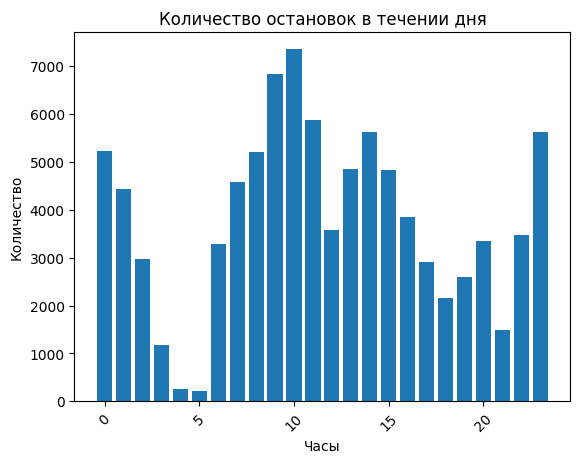

In [ ]:
dict_hours = descr_df.loc["stop_time_hour"]["Частота"]

plt.bar(dict_hours.keys(), dict_hours.values())


plt.xlabel('Часы')
plt.xticks(rotation=45)
plt.ylabel('Количество')
plt.title('Количество остановок в течении дня')

plt.show()

### 8. Верно ли, что большинство остановок происходило ночью?

- Столбцы: stop_datetime
- groubby
- plot

<Axes: >

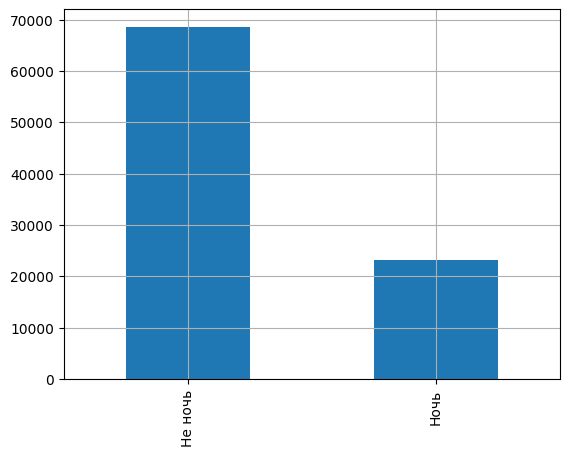

In [ ]:
# Если считать что в ночь входят следующие часы - [0, 1, 2, 3, 4 , 22, 23]
df["hours_bins"] = df["stop_time_hour"].apply(lambda x: "Ночь" if x in [0, 1, 2, 3, 4 , 22, 23] else "Не ночь")


df["hours_bins"].value_counts().plot(kind="bar", grid=True)

### 9. Найти плохие данные в столбце stop_duration (длительность остановки) и исправить их.

- Столбцы: stop_datetime
- loc

In [ ]:
# Пропусков нет
descr_df.loc["stop_duration"]["Частота"]

{'0-15 Min': 74876, '16-30 Min': 13635, '30+ Min': 3228, '2': 1, '1': 1}

### 10. Каково среднее время остановки (stop_duration) для каждого нарушения (violation_raw)?

- Столбцы: stop_duration, violation_raw
- Преобразование строк в числа
- Важно не только среднее, но и количество

In [ ]:
from pprint import pprint

pprint(descr_df.loc["violation"]["Частота"])
print(f"\n\n\n")
pprint(descr_df.loc["violation_raw"]["Частота"])

{'Equipment': 11020,
 'Moving violation': 16224,
 'Other': 9650,
 'Registration/plates': 3432,
 'Seat belt': 2952,
 'Speeding': 48463}




{'APB': 79,
 'Call for Service': 1298,
 'Equipment/Inspection Violation': 11020,
 'Motorist Assist/Courtesy': 203,
 'Other Traffic Violation': 16224,
 'Registration Violation': 3432,
 'Seatbelt Violation': 2952,
 'Special Detail/Directed Patrol': 2455,
 'Speeding': 48463,
 'Suspicious Person': 56,
 'Violation of City/Town Ordinance': 211,
 'Warrant': 15}


In [ ]:
keys = descr_df.loc["stop_duration"]["Частота"].keys()

keys

dict_keys(['0-15 Min', '16-30 Min', '30+ Min', '2', '1'])

In [ ]:
dictionary = {k: v for k, v in zip(keys, [8, 24, 45, 120, 60])}

df["stop_duration_time_mean (minutes)"] = df["stop_duration"].apply(lambda x: dictionary[x])


descr_df = get_info(df, fraquency=True)


descr_df

,Тип Данных,Кол-во пропусков,Кол-во уник. значений,Частота
Поле/Столбец (91741 значений),,,,
stop_date,datetime64[ns],0,3768,"{2012-01-11 00:00:00: 69, 2012-02-28 00:00:00:..."
stop_time,datetime64[ns],0,1436,"{2023-12-18 11:00:00: 323, 2023-12-18 10:00:00..."
driver_gender,object,0,3,"{'M': 62895, 'F': 23511, 'Nonbinary': 5335}"
driver_age_raw,float64,5327,97,"{1987.0: 3653, 1988.0: 3631, 1986.0: 3596, 198..."
driver_age,float64,0,78,"{31.0: 7821, 22.0: 4125, 21.0: 4063, 23.0: 398..."
driver_race,object,0,5,"{'White': 62158, 'Black': 12244, 'Hispanic': 9..."
violation_raw,object,5333,12,"{'Speeding': 48463, 'Other Traffic Violation':..."
violation,object,0,6,"{'Speeding': 48463, 'Moving violation': 16224,..."
search_conducted,bool,0,2,"{False: 88545, True: 3196}"


In [ ]:
search_counts = df.groupby(["violation_raw", "stop_duration_time_mean (minutes)"]).size().unstack().fillna(0)

search_counts

stop_duration_time_mean (minutes),8,24,45,60,120
violation_raw,,,,,
APB,37.0,24.0,18.0,0.0,0.0
Call for Service,547.0,435.0,316.0,0.0,0.0
Equipment/Inspection Violation,9173.0,1373.0,474.0,0.0,0.0
Motorist Assist/Courtesy,119.0,59.0,25.0,0.0,0.0
Other Traffic Violation,11763.0,3150.0,1310.0,0.0,1.0
Registration Violation,2421.0,804.0,207.0,0.0,0.0
Seatbelt Violation,2665.0,249.0,38.0,0.0,0.0
Special Detail/Directed Patrol,1622.0,613.0,220.0,0.0,0.0
Speeding,41014.0,6848.0,600.0,1.0,0.0


In [ ]:
# Среднее время остановки = (Сумма (количество раз * время остановки)) / (Общее количество раз)


average_duration = np.around(np.sum(search_counts.multiply(search_counts.columns, axis=1), axis=1) / np.sum(search_counts, axis=1), 1)


print("Среднее время остановки:")
for k, v in zip(average_duration.index, average_duration.values):
    print(f"{k:>50}: {np.around(v, 1)} минут(ы)")

Среднее время остановки:
                                               APB: 21.3 минут(ы)
                                  Call for Service: 22.4 минут(ы)
                    Equipment/Inspection Violation: 11.6 минут(ы)
                          Motorist Assist/Courtesy: 17.2 минут(ы)
                           Other Traffic Violation: 14.1 минут(ы)
                            Registration Violation: 14.0 минут(ы)
                                Seatbelt Violation: 9.8 минут(ы)
                    Special Detail/Directed Patrol: 15.3 минут(ы)
                                          Speeding: 10.7 минут(ы)
                                 Suspicious Person: 19.0 минут(ы)
                  Violation of City/Town Ordinance: 13.7 минут(ы)
                                           Warrant: 21.8 минут(ы)


### 11. Визуализировать результаты пункта 10

- Не использовать plot для категориальных данных
- Сортировка и ориентация графика даст лучший результат

<Axes: xlabel='violation_raw'>

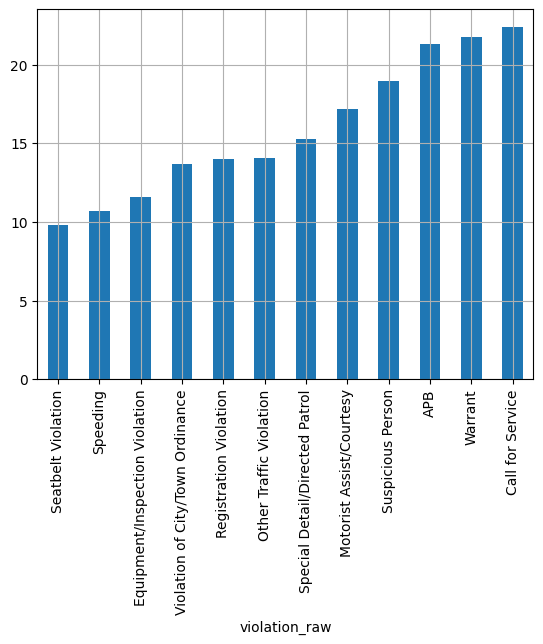

In [ ]:
average_duration.sort_values().plot(kind="bar", grid=True)

### 12. Рассчитать возрастное распределение для каждого нарушения

- Гистограммы (метод hist) - для визуализации распределений

In [ ]:
violations = df.groupby(["violation", "driver_gender", "age_bins"]).size().unstack().fillna(0)

violations

age_bins                                 0       1       2     3
violation           driver_gender                               
Equipment           F               1787.0   635.0    64.0   1.0
                    M               6099.0  2140.0   288.0   6.0
Moving violation    F               2051.0   979.0   166.0   8.0
                    M               7129.0  4887.0   984.0  20.0
Other               F                439.0   225.0    26.0   0.0
                    M               1521.0  1743.0   358.0   5.0
                    Nonbinary       5331.0     2.0     0.0   0.0
Registration/plates F                670.0   329.0    14.0   0.0
                    M               1637.0   700.0    82.0   0.0
Seat belt           F                490.0   138.0     7.0   0.0
                    M               1650.0   569.0    98.0   0.0
Speeding            F              10488.0  4301.0   680.0  13.0
                    M              21097.0  9875.0  1952.0  55.0
                    Nonbinary          2.0     0.0     0.0   0.0

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>,
        <Axes: >, <Axes: >]], dtype=object)

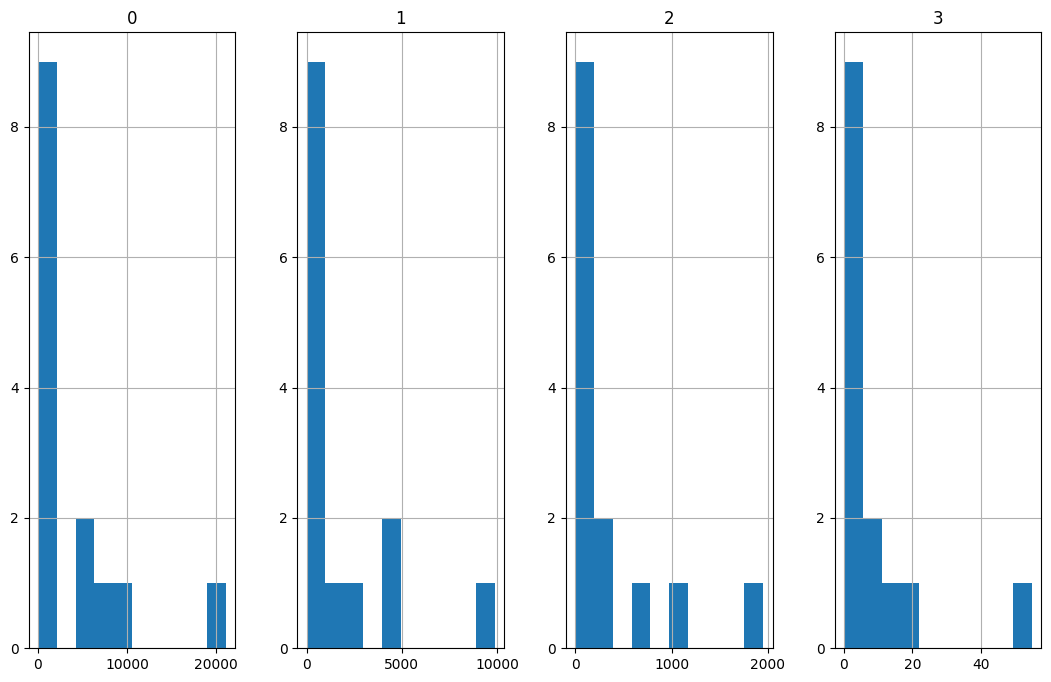

In [ ]:
violations.hist(figsize=(20, 8), layout=(-1, 6))

<Axes: xlabel='violation,driver_gender'>

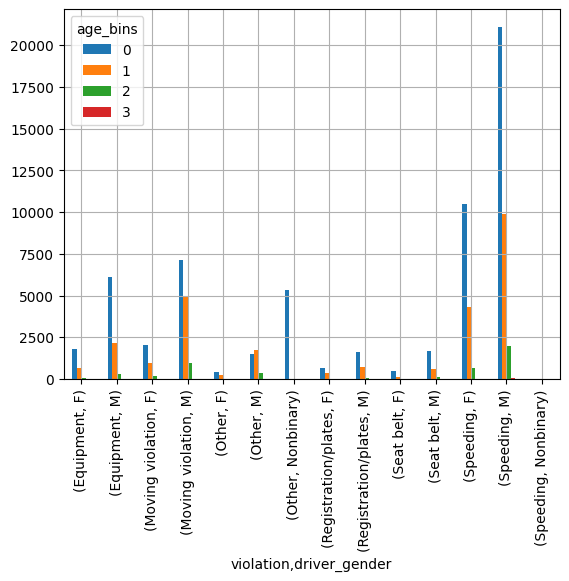

In [ ]:
violations.plot(kind='bar', grid=True)

### 13. Представьте, что столбца возраст водителя (driver_age) нет. Создать аналогичный столбец на основе года рождения (driver_age_raw) и назвать его (driver_age_new).

- head и tail могут быть не репрезентативны
- даже если в столбце данные частично отсутствуют, оставшиеся могут быть не корректными
- гистограммы - хороший способ проверить корректность выполненных преобразований

In [ ]:
descr_df = get_info(df, True, True, True)

descr_df

,Тип Данных,Кол-во пропусков,Кол-во уник. значений,Уник. значения,Частота,0|25|50|75|100 % квантили
Поле/Столбец (91741 значений),,,,,,
stop_date,datetime64[ns],0,3768,"[2005-01-02T00:00:00.000000000, 2005-01-18T00:...","{2012-01-11 00:00:00: 69, 2012-02-28 00:00:00:...",Категориальный Признак
stop_time,datetime64[ns],0,1436,"[2023-12-18T01:55:00.000000000, 2023-12-18T08:...","{2023-12-18 11:00:00: 323, 2023-12-18 10:00:00...",Категориальный Признак
driver_gender,object,5335,2,"[M, F, nan]","{'M': 62895, 'F': 23511}",Категориальный Признак
driver_age_raw,float64,0,97,"[1985.0, 1965.0, 1972.0, 1986.0, 1984.0, 1982....","{1970.0: 6999, 1987.0: 3653, 1988.0: 3631, 198...","[0.0, 1941.0, 1965.0, 1989.0, 8801.0]"
driver_age,float64,5621,78,"[20.0, 40.0, 33.0, 19.0, 21.0, 23.0, 36.0, 35....","{22.0: 4125, 21.0: 4063, 23.0: 3986, 20.0: 379...","[15.0, 34.2, 53.5, 72.8, 99.0]"
driver_race,object,5333,5,"[White, Black, Asian, nan, Hispanic, Other]","{'White': 62158, 'Black': 12244, 'Hispanic': 9...",Категориальный Признак
violation_raw,object,5333,12,"[Speeding, Call for Service, Equipment/Inspect...","{'Speeding': 48463, 'Other Traffic Violation':...",Категориальный Признак
violation,object,5333,6,"[Speeding, Other, Equipment, Moving violation,...","{'Speeding': 48463, 'Moving violation': 16224,...",Категориальный Признак
search_conducted,bool,0,2,"[False, True]","{False: 88545, True: 3196}",Категориальный Признак


In [ ]:
# Разница между медианой и средним - 10 лет
df["driver_age_raw"].mean(), df["driver_age_raw"].median()

(1970.4627047884806, 1978.0)

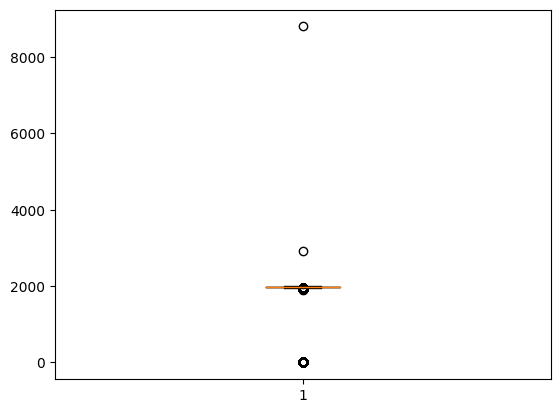

In [ ]:
prnt = plt.boxplot(df["driver_age_raw"])

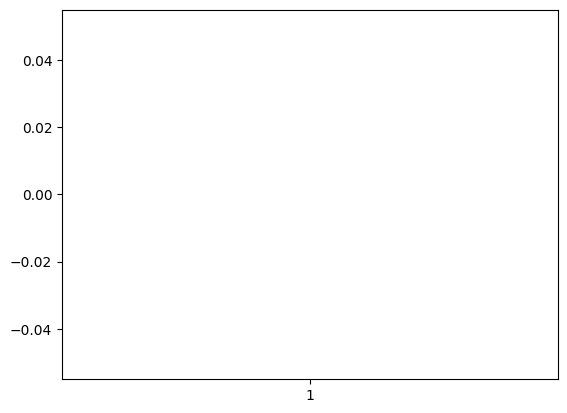

In [ ]:
def remove_outliers(df, col, threshold=1.5):
    df_copy = df.copy()

    q25, q75 = np.percentile(df_copy[col], [25, 75])
    iqr = q75 - q25

    lower = q25 - threshold * iqr
    upper = q75 + threshold * iqr

    df_copy.loc[(df_copy[col] < lower) | (df_copy[col] > upper), col] = np.nan

    return df_copy


df = remove_outliers(df, "driver_age_raw")

prnt = plt.boxplot(df["driver_age_raw"])

In [ ]:
descr_df = get_info(df, True, True, True)

descr_df

,Тип Данных,Кол-во пропусков,Кол-во уник. значений,Уник. значения,Частота,0|25|50|75|100 % квантили
Поле/Столбец (91741 значений),,,,,,
stop_date,datetime64[ns],0,3768,"[2005-01-02T00:00:00.000000000, 2005-01-18T00:...","{2012-01-11 00:00:00: 69, 2012-02-28 00:00:00:...",Категориальный Признак
stop_time,datetime64[ns],0,1436,"[2023-12-18T01:55:00.000000000, 2023-12-18T08:...","{2023-12-18 11:00:00: 323, 2023-12-18 10:00:00...",Категориальный Признак
driver_gender,object,5335,2,"[M, F, nan]","{'M': 62895, 'F': 23511}",Категориальный Признак
driver_age_raw,float64,885,71,"[1985.0, 1965.0, 1972.0, 1986.0, 1984.0, 1982....","{1970.0: 6999, 1987.0: 3653, 1988.0: 3631, 198...","[1941.0, 1958.5, 1976.0, 1993.5, 2013.0]"
driver_age,float64,5621,78,"[20.0, 40.0, 33.0, 19.0, 21.0, 23.0, 36.0, 35....","{22.0: 4125, 21.0: 4063, 23.0: 3986, 20.0: 379...","[15.0, 34.2, 53.5, 72.8, 99.0]"
driver_race,object,5333,5,"[White, Black, Asian, nan, Hispanic, Other]","{'White': 62158, 'Black': 12244, 'Hispanic': 9...",Категориальный Признак
violation_raw,object,5333,12,"[Speeding, Call for Service, Equipment/Inspect...","{'Speeding': 48463, 'Other Traffic Violation':...",Категориальный Признак
violation,object,5333,6,"[Speeding, Other, Equipment, Moving violation,...","{'Speeding': 48463, 'Moving violation': 16224,...",Категориальный Признак
search_conducted,bool,0,2,"[False, True]","{False: 88545, True: 3196}",Категориальный Признак


In [ ]:
df["driver_age_raw"] = df["driver_age_raw"].fillna(int(df["driver_age_raw"].mean()))

df["driver_age_raw"].isnull().sum()

0

In [ ]:
df["driver_age_new"] = df.apply(lambda row: abs(row["stop_date_year"] - row["driver_age_raw"]), axis=1)

descr_df = get_info(df, fraquency=True, quantile=True)

descr_df

,Тип Данных,Кол-во пропусков,Кол-во уник. значений,Частота,0|25|50|75|100 % квантили
Поле/Столбец (91741 значений),,,,,
stop_date,datetime64[ns],0,3768,"{2012-01-11 00:00:00: 69, 2012-02-28 00:00:00:...",Категориальный Признак
stop_time,datetime64[ns],0,1436,"{2023-12-18 11:00:00: 323, 2023-12-18 10:00:00...",Категориальный Признак
driver_gender,object,5335,2,"{'M': 62895, 'F': 23511}",Категориальный Признак
driver_age_raw,float64,0,71,"{1970.0: 6999, 1987.0: 3653, 1988.0: 3631, 198...","[1941.0, 1958.5, 1976.0, 1993.5, 2013.0]"
driver_age,float64,5621,78,"{22.0: 4125, 21.0: 4063, 23.0: 3986, 20.0: 379...","[15.0, 34.2, 53.5, 72.8, 99.0]"
driver_race,object,5333,5,"{'White': 62158, 'Black': 12244, 'Hispanic': 9...",Категориальный Признак
violation_raw,object,5333,12,"{'Speeding': 48463, 'Other Traffic Violation':...",Категориальный Признак
violation,object,5333,6,"{'Speeding': 48463, 'Moving violation': 16224,...",Категориальный Признак
search_conducted,bool,0,2,"{False: 88545, True: 3196}",Категориальный Признак
